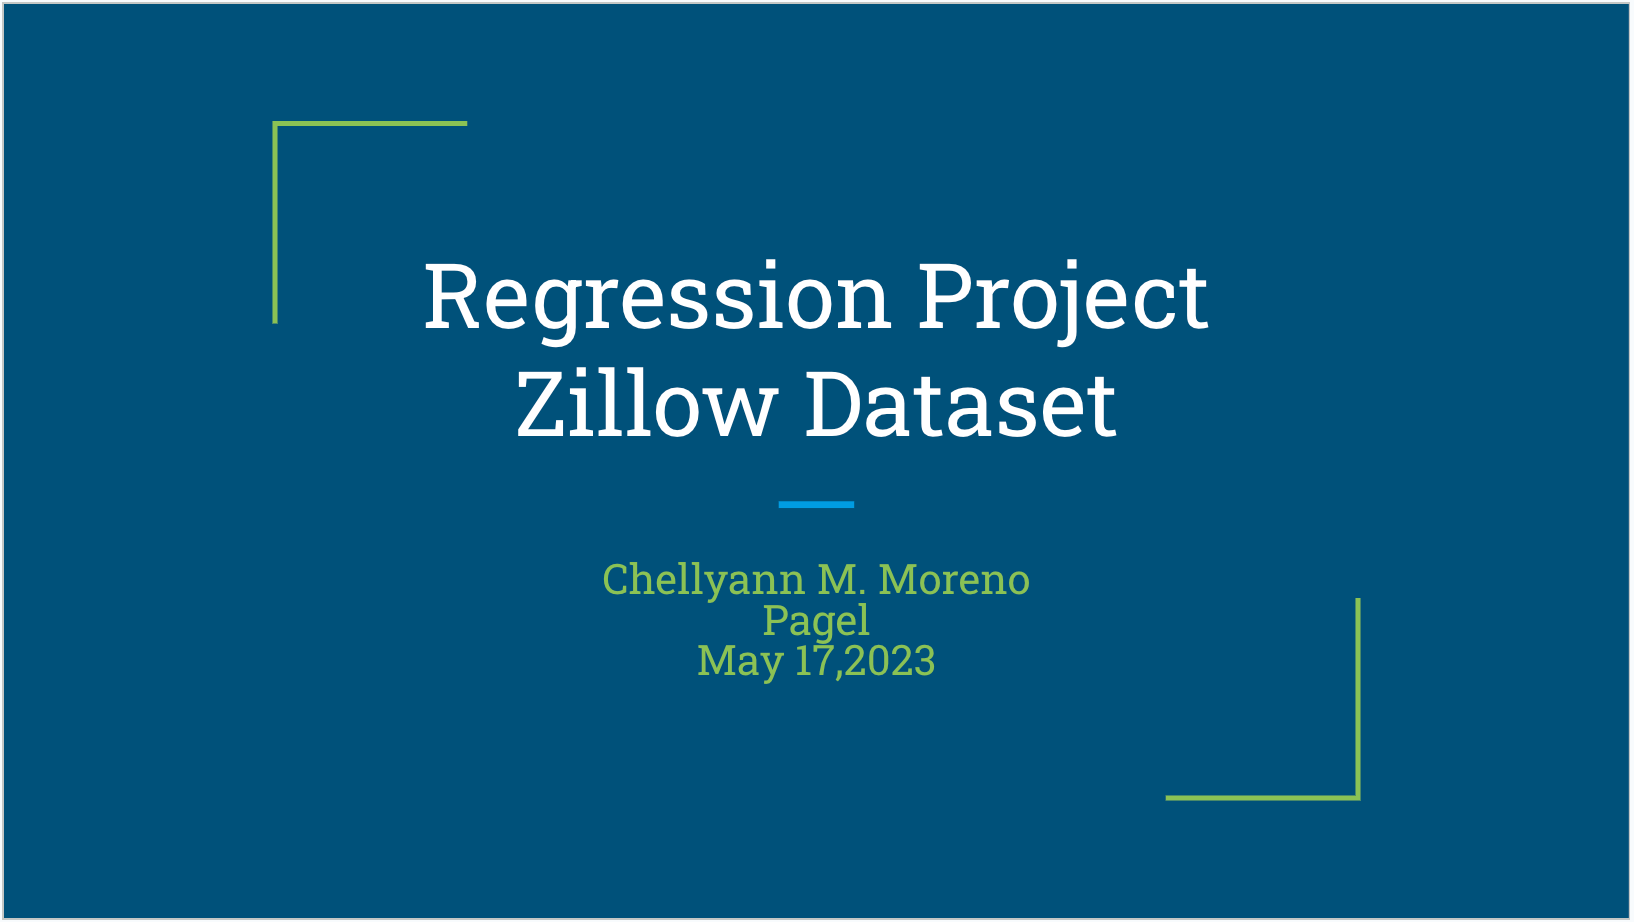

# Project Goals:
We would be analyzing single family houses that had a transaction in 2017 from the Zillow dataset.

Exploring the different factors that affect the tax value.

We would be attempting to improve the tax value predictions using regression.



This data would not be used on future customers or for real life prediction.

# Imports

In [1]:
# import personal functions
import pandas as pd 
import env as env
import wrangle as w
import explore as e
import numpy as np

#import feature engineering, and modeling modules
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# import to hide annoying warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangle!

### Acquired:
 - The data  was acquiredfrom Codeup Data Server in MYSQL. Raw data would be downloaded and "zillow.csv" has been created which would be use to pull the data during this project.
 - Data contains 52,441 rows, each representing a single property.

In [2]:
# Function to import csv 
df=w.get_data()


### Preparation:
- Columns were renamed for better identifacation
- County column were turned into object and renamed with county names, and encoded.
- The air_conditioning and pool nulls were filled with zeroes. All other nulls were dropped
- Removed properties with more than 8-9 and bedrooms and/or bathrooms.
- Removed properties with 0 bathrooms and/or bedrooms
- Removed properties with more than 18,000 sqt footage.
- Some columns were turned into integer.

- Keeping: 52,158 rows

In [3]:
# Function to prep data
df=w.wrangle_data(df)


In [4]:
# function to split data into train,validate, test
train,validate,test=w.split_data(df)

In [5]:
# quick look at the data
train.head()

,parcelid,bathrooms,bedrooms,area,yearbuilt,air_conditioning,car_garage,pool,taxvalue,county,transactiondate,LA,Orange,Ventura,LA,Orange,Ventura
1746629,17086327,3.0,4,1842,1977,0,2.0,0.0,654000,Ventura,2017-07-20,0,0,1,0,0,1
225790,11267839,2.0,3,1052,1951,1,0.0,0.0,178500,LA,2017-03-21,1,0,0,1,0,0
481397,12857572,3.0,4,2487,1965,0,0.0,0.0,786000,LA,2017-08-11,1,0,0,1,0,0
1183785,14346145,2.5,3,2376,1986,0,2.0,0.0,521881,Orange,2017-05-05,0,1,0,0,1,0
341452,12224329,2.0,2,1631,1948,0,0.0,0.0,60635,LA,2017-07-20,1,0,0,1,0,0


In [6]:
# data statistics
train.describe()

,parcelid,bathrooms,bedrooms,area,yearbuilt,air_conditioning,car_garage,pool,taxvalue,LA,Orange,Ventura,LA,Orange,Ventura
count,3.129400e+04,31294.000000,31294.000000,31294.000000,31294.000000,31294.000000,31294.000000,31294.000000,3.129400e+04,31294.000000,31294.000000,31294.000000,31294.000000,31294.000000,31294.000000
mean,1.297795e+07,2.300313,3.301016,1913.907650,1963.400364,0.263309,0.664057,0.210935,5.220436e+05,0.647121,0.270020,0.082859,0.647121,0.270020,0.082859
std,2.997068e+06,1.003878,0.916555,978.092708,23.048331,0.440436,0.956692,0.407979,7.002864e+05,0.477873,0.443977,0.275674,0.477873,0.443977,0.275674
min,1.071186e+07,1.000000,1.000000,152.000000,1878.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.151338e+07,2.000000,3.000000,1266.250000,1950.000000,0.000000,0.000000,0.000000,1.928095e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.257368e+07,2.000000,3.000000,1655.000000,1961.000000,0.000000,0.000000,0.000000,3.734430e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.412491e+07,3.000000,4.000000,2301.000000,1979.000000,1.000000,2.000000,0.000000,6.137360e+05,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.676392e+08,10.000000,8.000000,15450.000000,2016.000000,1.000000,4.000000,1.000000,2.538125e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploration

## Target Variable

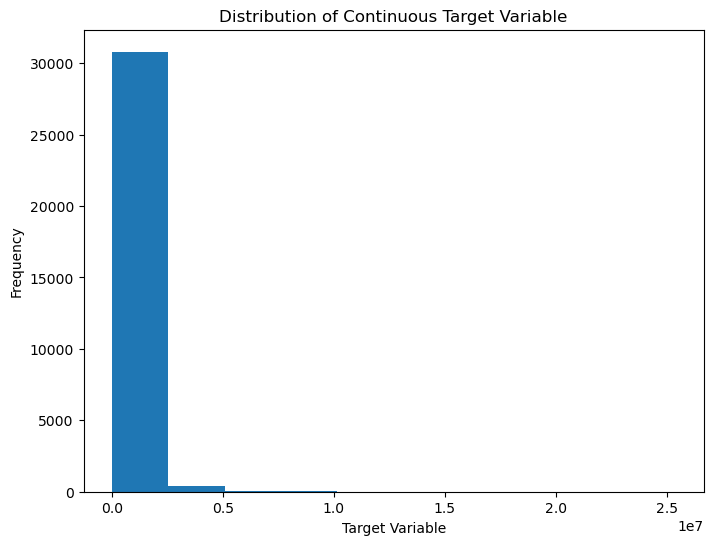

In [7]:
e.plot_continuous_target(train.taxvalue)

## 1. Having a pool affects the tax value of the property? 
H_$0$ : Having or not having a pool has no effect on the tax value of the property.
  
H_$a$: Having or not having a pool does affect the tax value of the property.

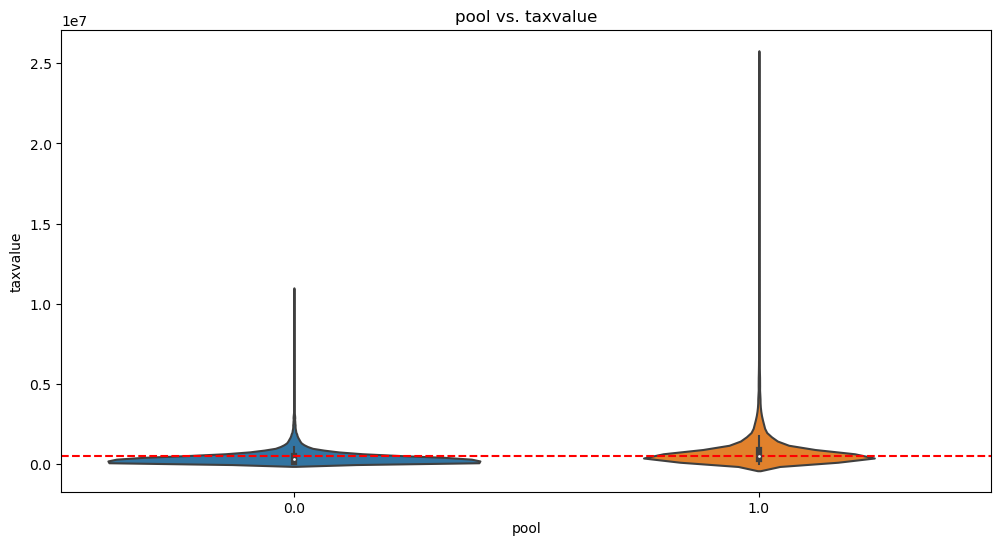

In [8]:
#function to plot cat variables vs cont variables
e.plot_categorical_and_continuous_vars(train,'pool',['taxvalue'])

## Statistical Test

In [9]:
# function to provide with a t test results:
e.statistical_tests_cont_cat(train.taxvalue,train.pool,alpha=0.05)

T-Test Results:
Test Statistic: -40.69956953097446
P-Value: 0.0
We reject the null hypothesis.


### Findings: Properties with an accesible pool have a higher tax value than properties that do not have a pool.


## 2. The amount of bedrooms affects the tax  value of the property?

H_$0$ : The amount of bedrooms has no effect on the tax value of the property.
  
H_$a$: The amount of bedrooms does affect the tax value of the property.

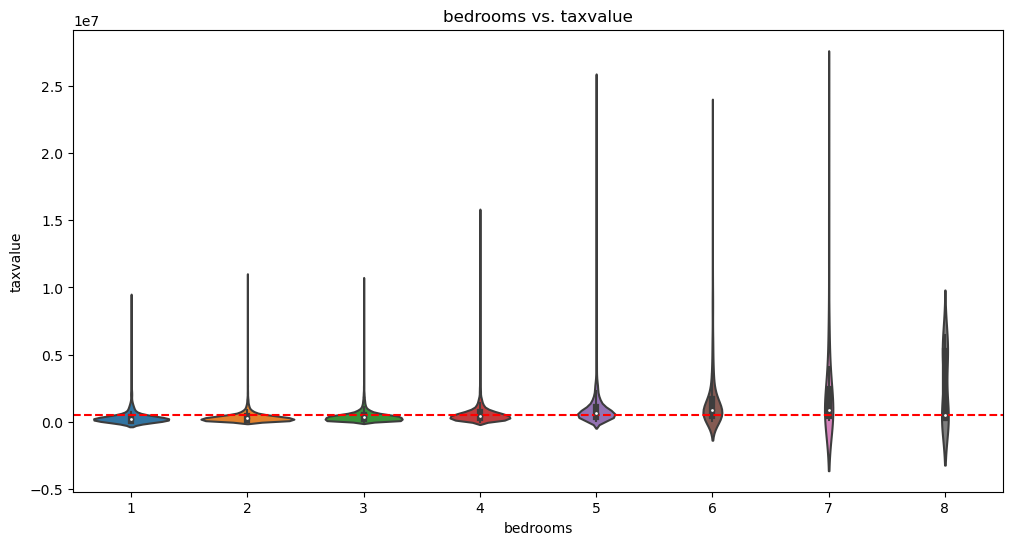

In [10]:
#function to plot cat variables vs cont variables
e.plot_categorical_and_continuous_vars(train,'bedrooms',['taxvalue'])

## Statistical Test

In [11]:
# function to provide with a stats test results:
e.perform_statistical_tests(train.bedrooms,train.taxvalue,0.05)

T-Test Results:
T-Statistic: -131.87390103548051
P-Value: 0.0
We reject the null hypothesis.

Mann-Whitney U Test Results:
U-Statistic: 0.0
P-Value: 0.0
We reject the null hypothesis.

Pearson Correlation Test Results:
Pearson Correlation Coefficient: 0.2693971076037108
P-Value: 0.0
We reject the null hypothesis.

Spearman Correlation Test Results:
Spearman Correlation Coefficient: 0.291353075229744
P-Value: 0.0
We reject the null hypothesis.


### Findings: Properties with more bedrooms have  a higher tax value.
### Houses with more than 5 bedrooms have a higher tax value.

## 3. Does county affects the tax value prices?

H_$0$ : The county has no effect on the tax value of the property.
  
H_$a$: The county does affect the tax value of the property.

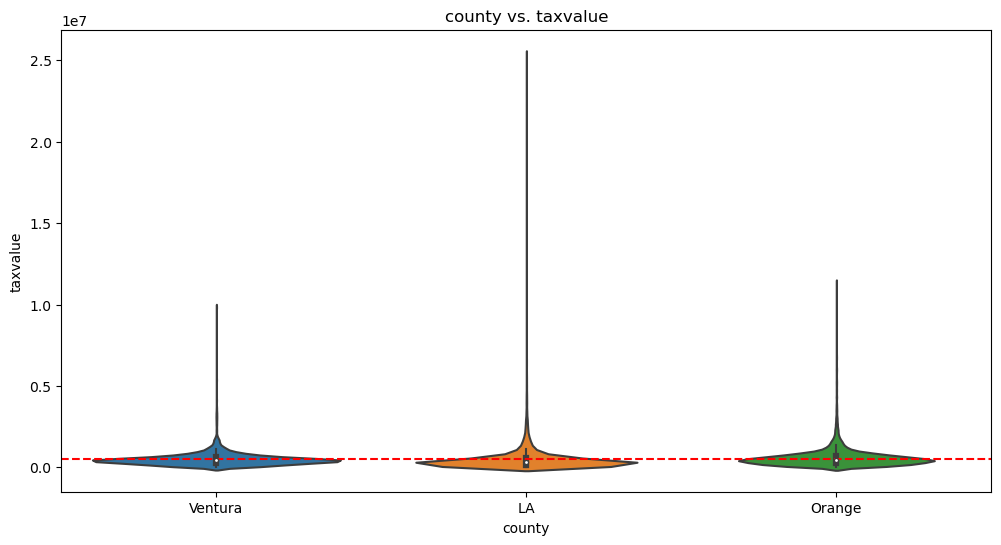

In [12]:
#function to plot cat variables vs cont variables
e.plot_categorical_and_continuous_vars(train,'county',['taxvalue'])

In [13]:
# function to provide with a stats test results:
e.statistical_tests_cont_cat(train.taxvalue,train.county,alpha=0.05)

Kruskal-Wallis Test Results:
Test Statistic: 1082.8431816430314
P-Value: 7.304503860346187e-236
We reject the null hypothesis.

ANOVA Results:
Test Statistic: 62.98826631199756
P-Value: 5.005670365185619e-28
We reject the null hypothesis.


### Findings: County does affects property values. Properties in LA county have a higher tax value than the Orange and Ventura.

## 4. Does  having air conditioning affects tax value of the property?
H_$0$ : Having or not having air conditioning has no effect on the tax value of the property.
  
H_$a$: Having or not having air conditioning does affect the tax value of the property.

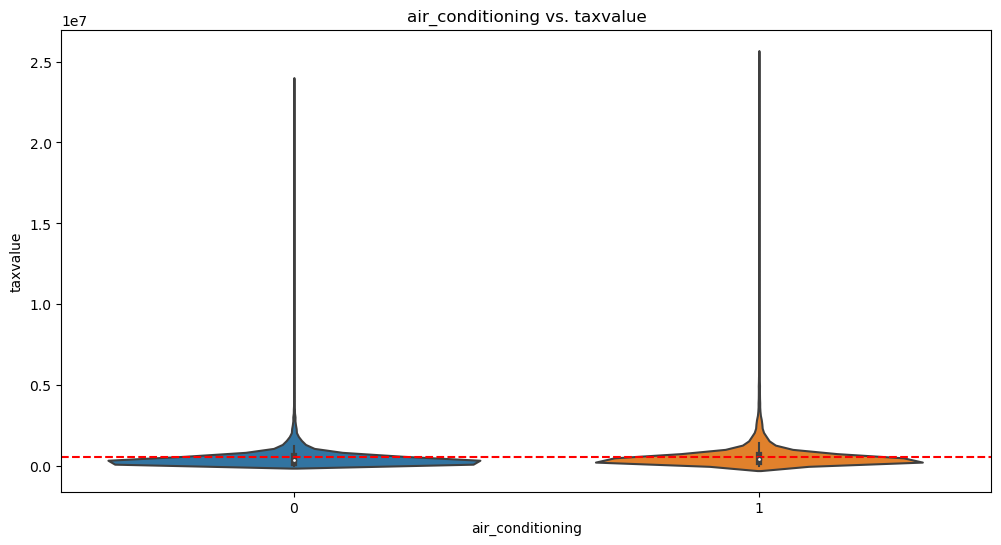

In [26]:
# function to provide with a plot:
e.plot_categorical_and_continuous_vars(train,'air_conditioning',['taxvalue'])

## Statistical Test

In [15]:
# function to provide with a t test results:
e.statistical_tests_cont_cat(train.taxvalue,train.air_conditioning,alpha=0.05)

T-Test Results:
Test Statistic: -15.451973035082057
P-Value: 1.1555106498489662e-53
We reject the null hypothesis.


### Findings: Properties with  air conditioning have a higher tax value.

## Exploration Summary:
1. Properties in LA county have a higher tax value than the Orange and Ventura.
2. Having air conditioning would increase the property tax value.
3. The more bedrooms (the merrier) the higher the tax value.
4. Having a pool would be a + on the property tax value.

# Evaluation and Modeling:
- Divided data sets in to x and y variables.
- Train, validate and test features were scaled using the Robust Scaler.
- Utilized feature engineering, SelectKbest and RFE to evaluate atleast top 3 features to use for modeling.
- Used the best model for the test dataset.

In [16]:
# dividing data into x and y var
x_train= train.drop(columns=['parcelid','taxvalue','county','Orange','transactiondate'])
y_train= train.taxvalue
x_validate= validate.drop(columns=['parcelid','taxvalue','county','Orange','transactiondate'])
y_validate=validate.taxvalue
x_test= test.drop(columns=['parcelid','taxvalue','county','Orange','transactiondate'])
y_test=test.taxvalue

In [17]:
# Function used for data scaling
x_train_scaled,x_validate_scaled,x_test_scaled=e.robust_scale_data(x_train,x_validate,x_test)

In [18]:
# applying SelectKBest to scaled data:
kbest = SelectKBest(f_regression, k=3)
kbest.fit(x_train_scaled,y_train)
x_train.columns[kbest.get_support()]

Index(['bathrooms', 'bedrooms', 'area'], dtype='object')

In [19]:
# applying RFE to scaled data:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(x_train_scaled,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [20]:
# adding results into a data frame
pd.DataFrame(
{'rfe_ranking':rfe.ranking_},
index=x_train.columns)

,rfe_ranking
bathrooms,1
bedrooms,1
area,1
yearbuilt,2
air_conditioning,3
car_garage,4
pool,9
LA,5
Ventura,6
LA,7


### Findings: 
- Both SelecKBest and RFE selected bathrooms, bedrooms, and area as the top best features that affect tax value.

### Features selected for modeling:
- area
- bathrooms
- bedrooms
- air_conditioning

In [21]:
#coonverting scaled data back into dataframe for modeling purposes
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)

x_validate_scaled = pd.DataFrame(x_validate_scaled, columns=x_validate.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [22]:
# selecting our features for each dataset
x_train_f=x_train_scaled[['area','bathrooms','bedrooms','air_conditioning']]
x_val_f=x_validate_scaled[['area','bathrooms','bedrooms','air_conditioning']]
x_test_f=x_test_scaled[['area','bathrooms','bedrooms','air_conditioning']]

In [23]:
# Baseline:
yhat=y_train.mean()
yhat
yhat= np.repeat(yhat, len(train))
rmse,r2=e.metrics_reg(y_train,yhat)
print("The baseline model results:",rmse,r2)

The baseline model results: 700275.1960437504 0.0


In [24]:
# function to calculate and add regression models results into a dataframe
e.calculate_regression_results(x_train_f, y_train, x_val_f, y_validate)

,Model,Alpha,Degree,RMSE,R2
0,OLS,NaN,None,505701.333393,0.428226
1,LassoLARS,0.100,None,505701.333393,0.428226
2,LassoLARS,0.010,None,505701.333393,0.428226
3,LassoLARS,0.001,None,505701.333393,0.428226
4,Polynomial Regression,NaN,1,505701.333393,0.428226
5,Polynomial Regression,NaN,2,478856.587383,0.487319
6,Polynomial Regression,NaN,3,487514.328212,0.468613
7,Polynomial Regression,NaN,4,498960.672214,0.443367


### The best model with the best RMSE and R2 is: Polymnomial Regression with a degree of three.
- This model would be used to calculate our test data set

In [25]:
# visualizing the best model on the test dataset
metrics=e.calculate_regression_results(x_train_f, y_train, x_test_f, y_test)
test_metric=metrics.iloc[6]
test_metric

Model     Polynomial Regression
Alpha                       NaN
Degree                        3
RMSE              543405.153347
R2                      0.44146
Name: 6, dtype: object

### Findings our model performed ~44% than our baseline.

# Summary and Key Findings:
1. During exploration we proved that the following features have an effect on tax value of the properties: pool,       bedrooms, air_conditioning and county.
2. During feature engineering we have found: SelecKBest and RFE selected bathrooms, bedrooms, and area as the      top best features that affect tax value.
3. The best model with the best RMSE and R2 is: Polymnomial Regression with a degree of three, which performed ~44% better than baseline.

# Recommendations:

Based on our observations, we recomment using the machine model to better predict the tax value amount of properties. Keeping in mind utilizing the features used above.

# Next Steps
- Given more time I would like to explore other features to best predict tax value.
- Look at different hypermaters and features to better the machine model.

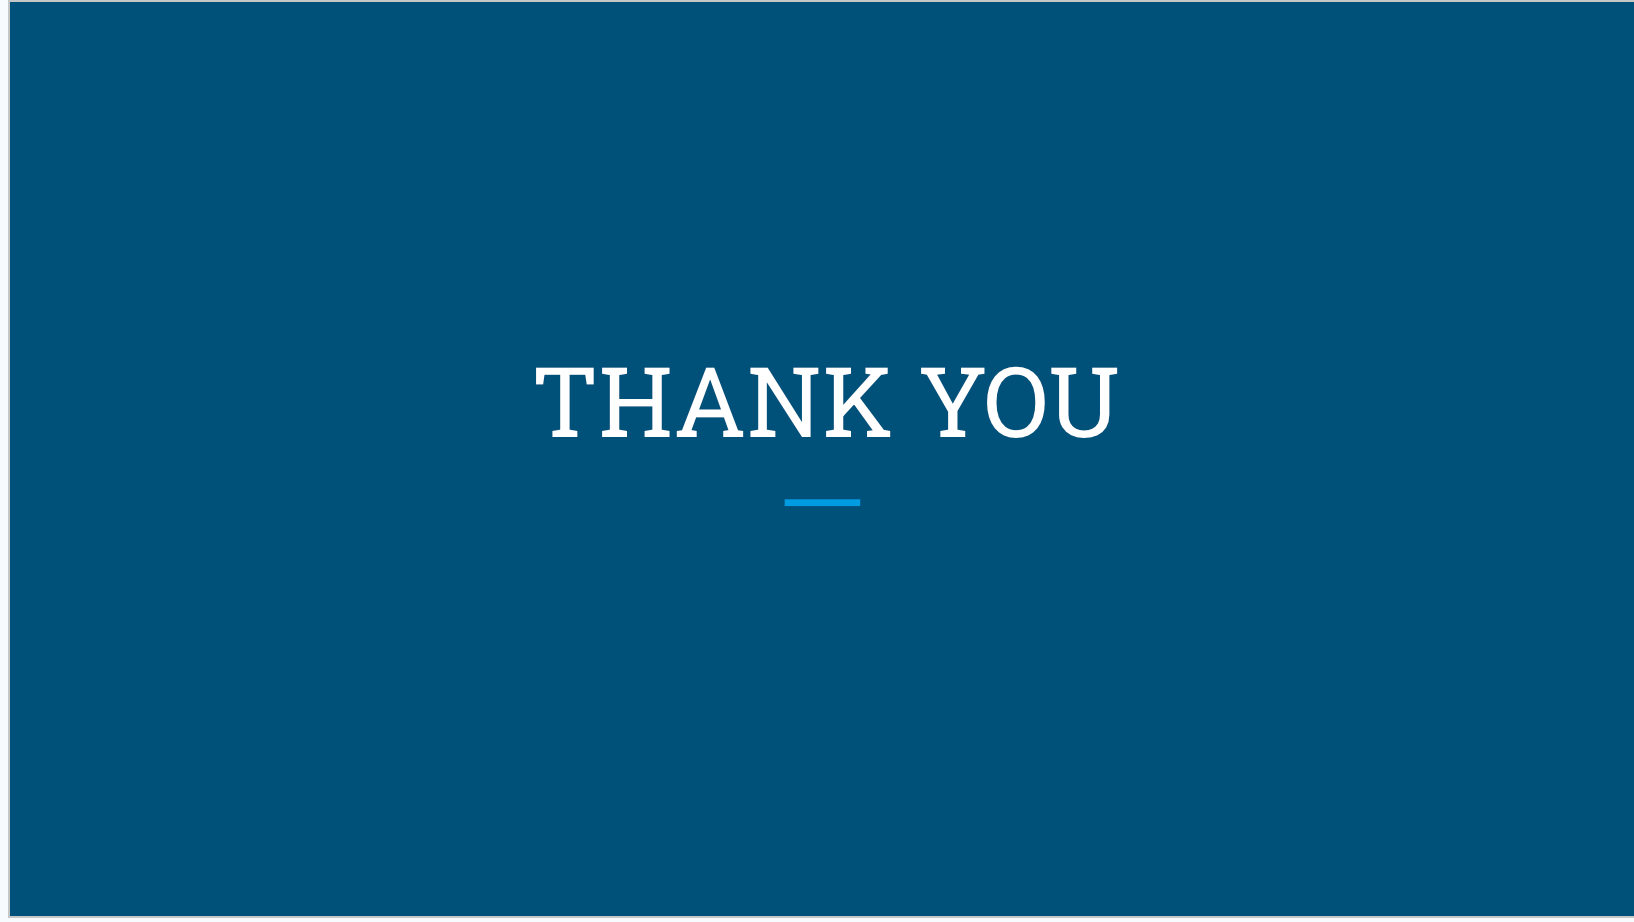
